In [1]:
import matplotlib.pyplot as plt
import jax.numpy as np
from jax import grad, jit, vmap
import pandas as pd
from typing import Tuple, Callable, Dict, List, TypeVar

In [2]:
Cts = Callable[float, float]  # not true, but works for know


def f1(x):
    return np.sin(np.power(x - 1, 2)) / 2


def f2(x):
    return np.power(5, -x) - 2


In [3]:
def Bisection(f: Cts, x: Tuple[float, float], eps=1e-4, max_iter=15):
    start, end = x
    a = [start]
    b = [end]

    def mid(a, b):
        return (a + b) / 2

    p = []
    fp = []
    for i in range(max_iter):
        p.append(mid(a[i], b[i]))
        fp.append(f(p[i]))
        if fp[i] == 0 or (b[i] - a[i]) / 2 < eps:
            break
        if fp[i] * f(a[i]) > 0:
            a.append(p[i])
            b.append(b[i])
        else:
            a.append(a[i])
            b.append(p[i])
    return p

In [4]:
x = np.linspace(-1, 2)

In [5]:
res = Bisection(f1, (-1, 2))
res

[0.5,
 -0.25,
 -0.625,
 -0.8125,
 -0.71875,
 -0.765625,
 -0.7890625,
 -0.77734375,
 -0.771484375,
 -0.7744140625,
 -0.77294921875,
 -0.772216796875,
 -0.7725830078125,
 -0.77239990234375,
 -0.772491455078125]

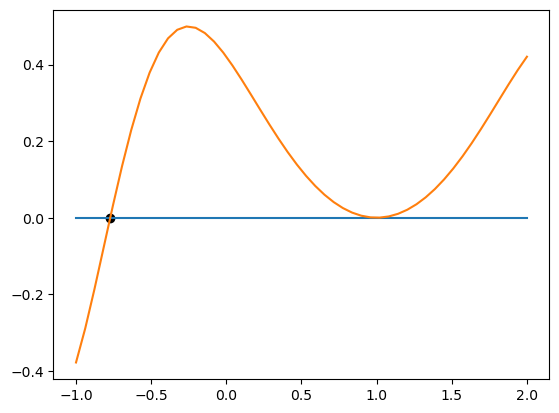

In [6]:
y = f1(x)
plt.scatter(res[-1], [0], color="black")
plt.plot(x, np.zeros(np.shape(x)))
plt.plot(x, y)

In [7]:
def General_Iter_Method(
    succ: Callable[List[float], float],
    p0: float,
    tol: float,
    max_iter: int,
):
    p: List[float] = []
    p.append(p0)
    for i in range(1, max_iter):
        p.append(succ(p))
        if np.abs(p[i] - p[i - 1]) < tol:
            break
    return p


def Fixed_Point(f: Cts, p0: float, tol=1e-4, max_iter=15, g=None):
    if g is None:

        def g(x):
            return x - f(x)

    return General_Iter_Method(g, p0, tol, max_iter)


def Newton(f: Cts, p0: float, tol=1e-4, max_iter=15):
    p0 = float(p0)

    def succ(ps):
        p = ps[-1]
        return float(p - f(p) / grad(f)(p))

    return General_Iter_Method(succ, p0, tol, max_iter)


def Secant(f: Cts, p: Tuple[float, float], eps=1e-4, max_iter=15):
    p0_org, p1_org = p

    def succ(ps):
        if len(ps) == 1:
            return p1_org
    
        p0, p1 = ps[-2:]
        q0 = f(p0)
        q1 = f(p1)

        p2 = p1 - q1 * (p1 - p0) / (q1 - q0)
        return p2

    return General_Iter_Method(succ, p0_org, tol, max_iter)